In [6]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, LSTM, Concatenate
from tensorflow.keras.utils import plot_model

In [7]:
import numpy as np

#loading samples [input, expected_output]
[input_data, output_data] = np.load("data_samples.npy")
print ("Data samples lenght : ")
print (len(input_data))
print (len(output_data))

#Data samples for training
input_train = input_data[:int(len(input_data) * .50)]
output_train = output_data[:int(len(output_data) * .50)]
assert(len(input_train)==len(output_train))
print ("Train data samples lenght : ")
print (len(input_train))
print (len(output_train))

input_train = np.reshape(input_train, (input_train.shape[0], 1, input_train.shape[1]))

#Data samples for validation and testing
in_data = input_data[int(len(input_train)):]
input_val = in_data[:int(len(in_data) * .50)]
input_test = in_data[int(len(input_val)):]

out_data = output_data[int(len(output_train)):]
output_val = out_data[:int(len(out_data) * .50)]
output_test = out_data[int(len(output_val)):]

assert(len(input_val)==len(output_val))
assert(len(input_test)==len(output_test))

input_val = np.reshape(input_val, (input_val.shape[0], 1, input_val.shape[1]))

input_test = np.reshape(input_test, (input_test.shape[0], 1, input_test.shape[1]))

print ("Validation data samples lenght : ")
print (len(input_val))
print (len(output_val))

print ("Test data samples lenght : ")
print (len(input_test))
print (len(output_test))

Data samples lenght : 
576
576
Train data samples lenght : 
288
288
Validation data samples lenght : 
144
144
Test data samples lenght : 
144
144


In [9]:
#Exemple 1 
input_tensor = Input(shape=(None, 7))
lstm_layer_output = LSTM(units=8)(input_tensor)
output_layer = Dense(7, activation='sigmoid', name='output_layer')(lstm_layer_output)
model = Model(inputs=[input_tensor], outputs=[output_layer])
print("Model :")
print(model.summary())

Model :
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, 7)]         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 512       
_________________________________________________________________
output_layer (Dense)         (None, 7)                 63        
Total params: 575
Trainable params: 575
Non-trainable params: 0
_________________________________________________________________
None


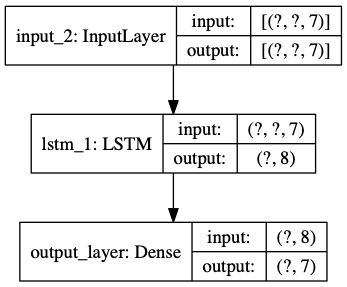

In [10]:
plot_model(model, to_file='mode.png', show_shapes=True, show_layer_names=True)

In [11]:
model.compile(loss=['mean_squared_error'], optimizer='adam', metrics=['accuracy'])

In [12]:
print((input_train.shape))
print((output_train.shape))

(288, 1, 7)
(288, 7)


In [13]:

model.fit(input_train,{'output_layer': output_train},
       validation_data=(input_val, {'output_layer': output_val}),
       epochs=10, batch_size=1, verbose=1)

Train on 288 samples, validate on 144 samples
Epoch 1/10
288/288 [==============================] - 3s 12ms/sample - loss: 0.2203 - accuracy: 0.0799 - val_loss: 0.1899 - val_accuracy: 0.1458
Epoch 2/10
288/288 [==============================] - 1s 3ms/sample - loss: 0.1587 - accuracy: 0.1840 - val_loss: 0.1368 - val_accuracy: 0.2778
Epoch 3/10
288/288 [==============================] - 1s 3ms/sample - loss: 0.1253 - accuracy: 0.3333 - val_loss: 0.1210 - val_accuracy: 0.1875
Epoch 4/10
288/288 [==============================] - 1s 3ms/sample - loss: 0.1166 - accuracy: 0.2639 - val_loss: 0.1167 - val_accuracy: 0.2778
Epoch 5/10
288/288 [==============================] - 1s 3ms/sample - loss: 0.1133 - accuracy: 0.3715 - val_loss: 0.1146 - val_accuracy: 0.2778
Epoch 6/10
288/288 [==============================] - 1s 3ms/sample - loss: 0.1109 - accuracy: 0.3715 - val_loss: 0.1126 - val_accuracy: 0.2778
Epoch 7/10
288/288 [==============================] - 1s 3ms/sample - loss: 0.1084 - accu